### Import Libraries

In [2]:
import torch
import numpy as np
from LISTA_essential import LISTA_train, LISTA_test
import time
import torch.nn as nn
import util

In [3]:
sparsity = 3
n = 100
m = 30
numTrain = 30000
numTest = 3000

seed = 80
np_seed = np.random.RandomState(seed)
generator = util.datagen(n, m, sparsity, np_seed)
A = generator.generate_measurement_matrix()

if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'
learning_rate = 5e-4
numEpochs = 25
numLayers = 15

loss_function = nn.MSELoss()


### SNR=5dB

In [4]:
SNR_5 = 5

X_train_5, Y_train_5 = generator.data_gen(A, numTrain, [SNR_5])
X_test_5, Y_test_5 = generator.data_gen(A, numTest, [SNR_5])

In [5]:
start = time.time()

net_5 = LISTA_train(X_train_5, Y_train_5[0], A, numEpochs, numLayers, device, learning_rate)
print(f'time taken is {time.time() - start}')
print('Learned threshold is ', net_5.thr)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 0, Loss: 0.514882504940033
Training - Epoch: 1, Loss: 0.24992454051971436
Training - Epoch: 2, Loss: 0.1783536672592163
Training - Epoch: 3, Loss: 0.135572150349617
Training - Epoch: 4, Loss: 0.107145294547081
Training - Epoch: 5, Loss: 0.08684439212083817
Training - Epoch: 6, Loss: 0.07160212099552155
Training - Epoch: 7, Loss: 0.0597364641726017
Training - Epoch: 8, Loss: 0.05025433376431465
Training - Epoch: 9, Loss: 0.04252685606479645
Training - Epoch: 10, Loss: 0.036129653453826904
Training - Epoch: 11, Loss: 0.030780239030718803
Training - Epoch: 12, Loss: 0.02546032890677452
Training - Epoch: 13, Loss: 0.020634228363633156
Training - Epoch: 14, Loss: 0.016923798248171806
Training - Epoch: 15, Loss: 0.013997339643537998
Training - Epoch: 16, Loss: 0.011672058142721653
Training - Epoch: 17, Loss: 0.009789176285266876
Training - Epoch: 18, Loss: 0.008237018249928951
Training - Epoch: 19, Loss: 0.007415591273456

In [ ]:
start = time.time()

net_5 = LISTA_train(X_train_5, Y_train_5[0], A, numEpochs, numLayers, device, learning_rate)
print(f'time taken is {time.time() - start}')
print('Learned threshold is ', net_5.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 0, Loss: 0.5113437175750732
Training - Epoch: 1, Loss: 0.24718302488327026
Training - Epoch: 2, Loss: 0.17594946920871735
Training - Epoch: 3, Loss: 0.13354578614234924
Training - Epoch: 4, Loss: 0.10539250820875168
Training - Epoch: 5, Loss: 0.08531379699707031
Training - Epoch: 6, Loss: 0.07024113833904266
Training - Epoch: 7, Loss: 0.05851765349507332
Training - Epoch: 8, Loss: 0.049149975180625916
Training - Epoch: 9, Loss: 0.04152636602520943
Training - Epoch: 10, Loss: 0.03522410988807678
Training - Epoch: 11, Loss: 0.029956920072436333
Training - Epoch: 12, Loss: 0.024789638817310333
Training - Epoch: 13, Loss: 0.020145228132605553
Training - Epoch: 14, Loss: 0.0165021400898695
Training - Epoch: 15, Loss: 0.01357835903763771
Training - Epoch: 16, Loss: 0.011257766745984554
Training - Epoch: 17, Loss: 0.00939678680151701
Training - Epoch: 18, Loss: 0.007867756299674511
Training - Epoch: 19, Loss: 0.00706359930

In [38]:
X_est_5 = LISTA_test(net_5, Y_test_5[0], A, device)
l1=loss_function(torch.tensor(X_est_5),torch.tensor(X_test_5))
l2=loss_function(torch.tensor(X_test_5),torch.zeros_like(torch.tensor(X_test_5)))
dbloss = l1.item()/l2.item()
mse_5 = np.log(dbloss)*10
hr_list = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test_5.T, X_est_5.T)])
hr_5 = np.mean(hr_list)

In [39]:
print(f"MSE = {mse_5:.3f}dB\nHit Rate = {hr_5:.2f}%")

MSE = -4.487dB
Hit Rate = 77.92%


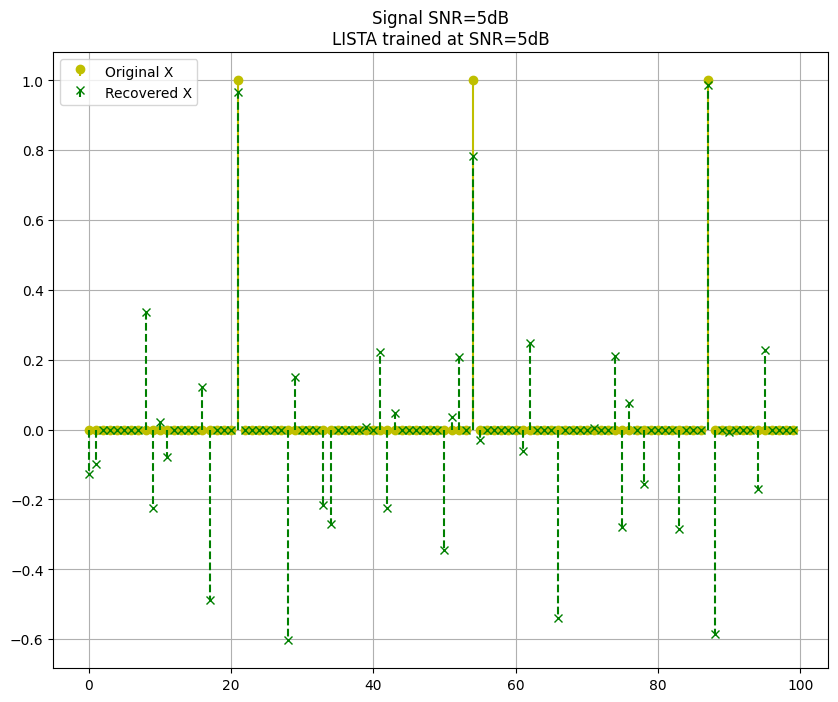

In [40]:
plotter = util.plotter()
plotter.stem_plot(X_test_5, [X_est_5], [SNR_5], SNR_5, SNR_5, 10)

### SNR=15dB

In [12]:
SNR_15 = 15

X_train_15, Y_train_15 = generator.data_gen(A, numTrain, [SNR_15])
X_test_15, Y_test_15 = generator.data_gen(A, numTest, [SNR_15])

In [13]:
start = time.time()

net_15 = LISTA_train(X_train_15, Y_train_15[0], A, numEpochs, numLayers, device, learning_rate)
print(f'time taken is {time.time() - start}')
print('Learned threshold is ', net_15.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 0, Loss: 0.48997974395751953
Training - Epoch: 1, Loss: 0.24401073157787323
Training - Epoch: 2, Loss: 0.17363879084587097
Training - Epoch: 3, Loss: 0.1316996067762375
Training - Epoch: 4, Loss: 0.10386952757835388
Training - Epoch: 5, Loss: 0.08401249349117279
Training - Epoch: 6, Loss: 0.06911170482635498
Training - Epoch: 7, Loss: 0.057522982358932495
Training - Epoch: 8, Loss: 0.04826541990041733
Training - Epoch: 9, Loss: 0.04071979969739914
Training - Epoch: 10, Loss: 0.03448127210140228
Training - Epoch: 11, Loss: 0.029266543686389923
Training - Epoch: 12, Loss: 0.024119149893522263
Training - Epoch: 13, Loss: 0.019507847726345062
Training - Epoch: 14, Loss: 0.015912305563688278
Training - Epoch: 15, Loss: 0.013034498319029808
Training - Epoch: 16, Loss: 0.010737658478319645
Training - Epoch: 17, Loss: 0.008889234624803066
Training - Epoch: 18, Loss: 0.007371433079242706
Training - Epoch: 19, Loss: 0.0065681

In [41]:
X_est_15 = LISTA_test(net_15, Y_test_15[0], A, device)
l1=loss_function(torch.tensor(X_est_15),torch.tensor(X_test_15))
l2=loss_function(torch.tensor(X_test_15),torch.zeros_like(torch.tensor(X_test_15)))
dbloss = l1.item()/l2.item()
mse_15 = np.log(dbloss)*10
hr_list = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test_15.T, X_est_15.T)])
hr_15 = np.mean(hr_list)

In [42]:
print(f"MSE = {mse_15:.3f}dB\nHit Rate = {hr_15:.2f}%")

MSE = -40.978dB
Hit Rate = 100.00%


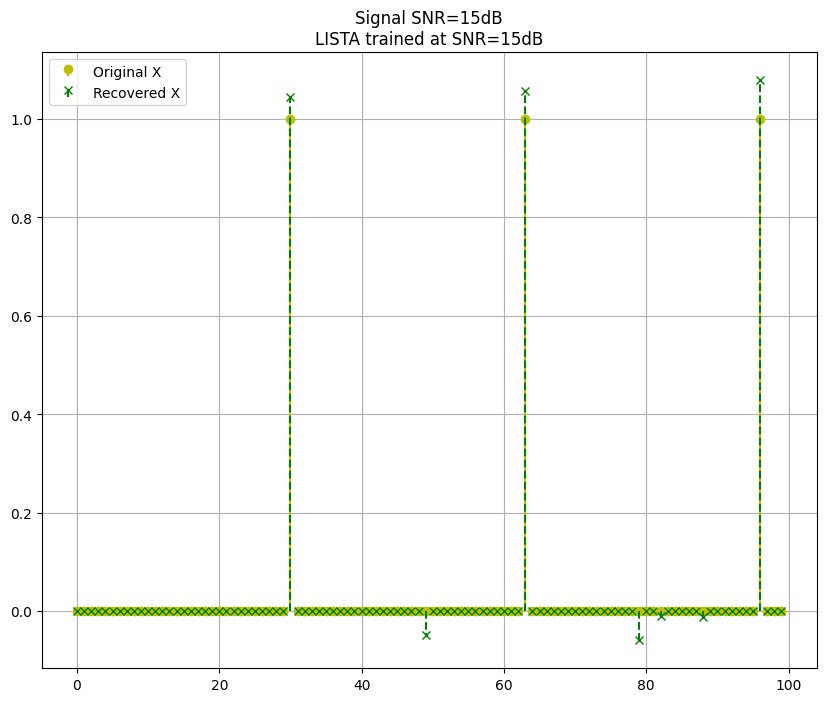

In [43]:
plotter = util.plotter()
plotter.stem_plot(X_test_15, [X_est_15], [SNR_15], SNR_15, SNR_15, 100)

### SNR=30dB

In [17]:
SNR_30 = 30

X_train_30, Y_train_30 = generator.data_gen(A, numTrain, [SNR_30])
X_test_30, Y_test_30 = generator.data_gen(A, numTest, [SNR_30])

In [18]:
start = time.time()

net_30 = LISTA_train(X_train_30, Y_train_30[0], A, numEpochs, numLayers, device, learning_rate)
print(f'time taken is {time.time() - start}')
print('Learned threshold is ', net_30.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 0, Loss: 0.48516735434532166
Training - Epoch: 1, Loss: 0.24330614507198334
Training - Epoch: 2, Loss: 0.17332763969898224
Training - Epoch: 3, Loss: 0.1315339207649231
Training - Epoch: 4, Loss: 0.10376856476068497
Training - Epoch: 5, Loss: 0.08396413177251816
Training - Epoch: 6, Loss: 0.06911654025316238
Training - Epoch: 7, Loss: 0.057563722133636475
Training - Epoch: 8, Loss: 0.04833386465907097
Training - Epoch: 9, Loss: 0.040819063782691956
Training - Epoch: 10, Loss: 0.034608498215675354
Training - Epoch: 11, Loss: 0.029420532286167145
Training - Epoch: 12, Loss: 0.024358490481972694
Training - Epoch: 13, Loss: 0.019765513017773628
Training - Epoch: 14, Loss: 0.0161492470651865
Training - Epoch: 15, Loss: 0.013286900706589222
Training - Epoch: 16, Loss: 0.011020028963685036
Training - Epoch: 17, Loss: 0.009193921461701393
Training - Epoch: 18, Loss: 0.007679262664169073
Training - Epoch: 19, Loss: 0.0068841

In [44]:
X_est_30 = LISTA_test(net_30, Y_test_30[0], A, device)
l1=loss_function(torch.tensor(X_est_30),torch.tensor(X_test_30))
l2=loss_function(torch.tensor(X_test_30),torch.zeros_like(torch.tensor(X_test_30)))
dbloss = l1.item()/l2.item()
mse_30 = np.log(dbloss)*10
hr_list = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test_30.T, X_est_30.T)])
hr_30 = np.mean(hr_list)

In [45]:
print(f"MSE = {mse_30:.3f}dB\nHit Rate = {hr_30:.2f}%")

MSE = -79.336dB
Hit Rate = 100.00%


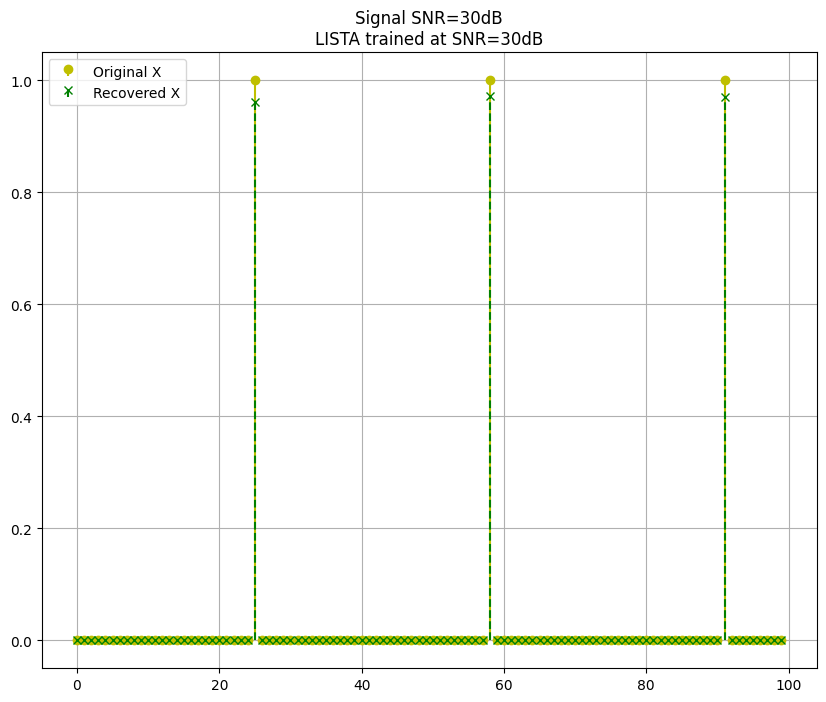

In [46]:
plotter = util.plotter()
plotter.stem_plot(X_test_30, [X_est_30], [SNR_30], SNR_30, SNR_30, 100)

### Mixed

In [22]:
seed_mixed = 10
np_seed_mixed = np.random.RandomState(seed_mixed)
X_train_mixed, Y_train_mixed = util.data_mix(np_seed_mixed, X_train_5, Y_train_5[0], X_train_15, Y_train_15[0], X_train_30, Y_train_30[0])
X_test_mixed, Y_test_mixed = util.data_mix(np_seed_mixed, X_test_5, Y_test_5[0], X_test_15, Y_test_15[0], X_test_30, Y_test_30[0])

In [23]:
start = time.time()

net_mixed = LISTA_train(X_train_mixed, Y_train_mixed, A, numEpochs, numLayers, device, learning_rate)
print(f'time taken is {time.time() - start}')
print('Learned threshold is ', net_mixed.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 0, Loss: 0.5101996064186096
Training - Epoch: 1, Loss: 0.24975547194480896
Training - Epoch: 2, Loss: 0.17763066291809082
Training - Epoch: 3, Loss: 0.13488397002220154
Training - Epoch: 4, Loss: 0.10657826066017151
Training - Epoch: 5, Loss: 0.08639247715473175
Training - Epoch: 6, Loss: 0.07123856991529465
Training - Epoch: 7, Loss: 0.05946718156337738
Training - Epoch: 8, Loss: 0.05005746707320213
Training - Epoch: 9, Loss: 0.04240070655941963
Training - Epoch: 10, Loss: 0.036061841994524
Training - Epoch: 11, Loss: 0.030758116394281387
Training - Epoch: 12, Loss: 0.02561185322701931
Training - Epoch: 13, Loss: 0.02101009711623192
Training - Epoch: 14, Loss: 0.017380299046635628
Training - Epoch: 15, Loss: 0.01445103995501995
Training - Epoch: 16, Loss: 0.012092756107449532
Training - Epoch: 17, Loss: 0.010188736952841282
Training - Epoch: 18, Loss: 0.008618238382041454
Training - Epoch: 19, Loss: 0.0077934134751

In [47]:
X_est_mixed = LISTA_test(net_mixed, Y_test_mixed, A, device)
l1=loss_function(torch.tensor(X_est_mixed),torch.tensor(X_test_mixed))
l2=loss_function(torch.tensor(X_test_mixed),torch.zeros_like(torch.tensor(X_test_mixed)))
dbloss = l1.item()/l2.item()
mse_mixed = np.log(dbloss)*10
hr_list = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test_mixed.T, X_est_mixed.T)])
hr_mixed = np.mean(hr_list)

In [48]:
print(f"MSE = {mse_mixed:.3f}dB\nHit Rate = {hr_mixed:.2f}%")

MSE = -21.259dB
Hit Rate = 94.48%


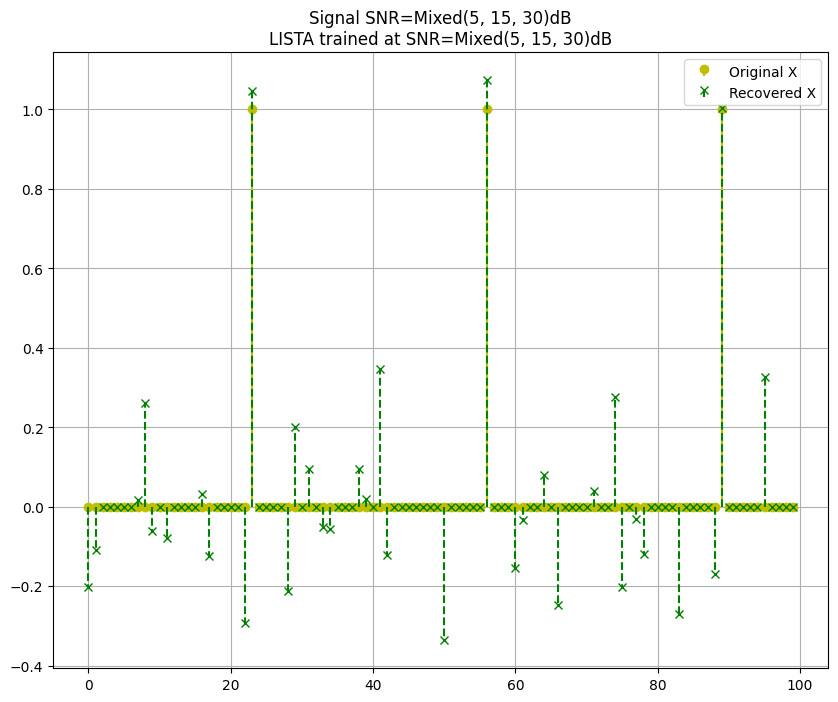

In [49]:
plotter = util.plotter()
plotter.stem_plot(X_test_mixed, [X_est_mixed], ["Mixed(5, 15, 30)"], "Mixed(5, 15, 30)", "Mixed(5, 15, 30)", 60)